# Dataset Feature Visualization

This notebook allows you to visualize the features of your audio datasets. It displays 10 samples per class, showing either mel-spectrograms or MFCC features depending on the feature type.

Supported datasets:
- AUDIO_MNIST
- GTZAN
- URBANSOUND8K

# Functions

In [ ]:
from src.datasets  import AudioMNISTDataset
from collections import defaultdict
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import torchaudio
import torch

def get_samples_per_class(dataset, num_samples=5):
    """Get samples per class of the dataset."""
    class_samples = defaultdict(list)

    for i in range(len(dataset)):
        sample, class_label = dataset[i]
        if len(class_samples[class_label]) >= num_samples:
            continue
        class_samples[class_label].append(sample)
    return class_samples

def plot_single_sample(sample, feature_type, title="Sample"):
    """Plots a single audio sample based on its feature type."""
    plt.figure(figsize=(10, 4))
    
    if feature_type.lower() == 'melspectrogram':
        # Para mel-spectrograms, aplicar transformación a dB
        db_transform = torchaudio.transforms.AmplitudeToDB()
        sample_db = db_transform(sample)
        
        plt.imshow(sample_db.squeeze().cpu().numpy(), origin='lower', aspect='auto', cmap='magma')
        plt.colorbar(format='%+2.0f dB')
        plt.xlabel("Time Frame")
        plt.ylabel("Mel Frequency Bin")
        plt.title(f"Mel Spectrogram - {title}")
    
    else:  # MFCC
        sample_squeezed = sample.squeeze().cpu().numpy()
        
        if len(sample_squeezed.shape) == 1:
            plt.bar(range(len(sample_squeezed)), sample_squeezed)
            plt.xlabel("MFCC Coefficients")
            plt.ylabel("Value")
            plt.title(f"MFCC Features - {title}")
        else:
            plt.imshow(sample_squeezed, origin='lower', aspect='auto', cmap='viridis')
            plt.colorbar(format='%+2.0f')
            plt.xlabel("Time Frames")
            plt.ylabel("MFCC Coefficients")
            plt.title(f"MFCC Visualization - {title}")
    
    plt.tight_layout()
    plt.show()

def plot_samples(samples_per_class, feature_type, max_samples=5):
    """Visualize samples per class."""
    num_classes = len(samples_per_class)
    
    fig, axes = plt.subplots(num_classes, max_samples, figsize=(20, num_classes * 3))
    
    if num_classes == 1:
        axes = axes.reshape(1, -1)
    elif max_samples == 1:
        axes = axes.reshape(-1, 1)
    
    for i, (class_label, samples) in enumerate(samples_per_class.items()):
        for j in range(max_samples):
            if j < len(samples):
                sample = samples[j]
                
                if feature_type.lower() == 'melspectrogram':
                    db_transform = torchaudio.transforms.AmplitudeToDB()
                    sample_db = db_transform(sample)
                    
                    im = axes[i, j].imshow(sample_db.squeeze().cpu().numpy(), 
                                         origin='lower', aspect='auto', cmap='magma')
                    axes[i, j].set_title(f'Clase {class_label} - Muestra {j+1}')
                    axes[i, j].set_xlabel('Time Frame')
                    axes[i, j].set_ylabel('Mel Frequency Bin')
                    
                    cbar = plt.colorbar(im, ax=axes[i, j], fraction=0.046, pad=0.04)
                    cbar.set_label('dB', rotation=270, labelpad=15)
                
                else:
                    sample_squeezed = sample.squeeze().cpu().numpy()
                    
                    if len(sample_squeezed.shape) == 1:
                        axes[i, j].bar(range(len(sample_squeezed)), sample_squeezed)
                        axes[i, j].set_title(f'Clase {class_label} - Muestra {j+1}')
                        axes[i, j].set_xlabel('MFCC Coefficients')
                        axes[i, j].set_ylabel('Value')
                        axes[i, j].grid(True, alpha=0.3)
                    else:
                        im = axes[i, j].imshow(sample_squeezed, origin='lower', 
                                             aspect='auto', cmap='viridis')
                        axes[i, j].set_title(f'Clase {class_label} - Muestra {j+1}')
                        axes[i, j].set_xlabel('Time Frames')
                        axes[i, j].set_ylabel('MFCC Coefficients')
                        
                        cbar = plt.colorbar(im, ax=axes[i, j], fraction=0.046, pad=0.04)
                        cbar.set_label('Value', rotation=270, labelpad=15)
            else:
                axes[i, j].axis('off')
    
    plt.tight_layout()
    plt.show()

## AUDIO_MNIST Dataset Visualization

Choose between mel-spectrogram and MFCC features for the AUDIO_MNIST dataset.

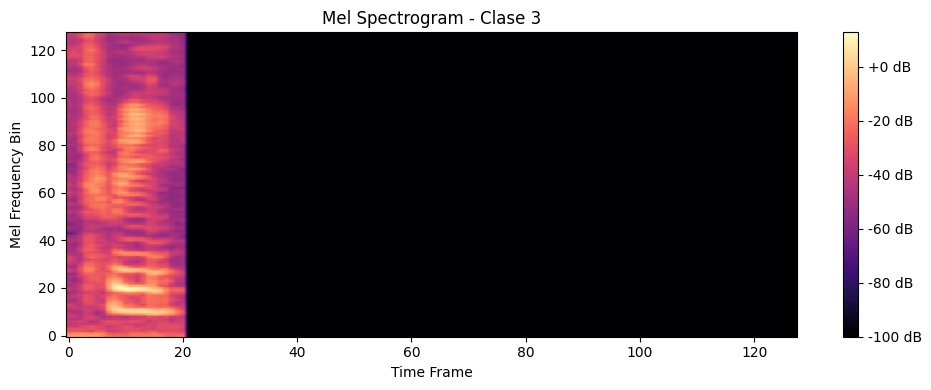

In [68]:
# Crear dataset con mel-spectrograms
feature_type = 'melspectrogram'
audio_mnist_mel = AudioMNISTDataset(
    root_dir="data/AUDIO_MNIST", 
    split='train', 
    feature_type=feature_type, 
    hop_length=512
)
# Visualizar una muestra individual
sample, label = audio_mnist_mel[3]
plot_single_sample(sample, feature_type, title=f"Clase {label}")

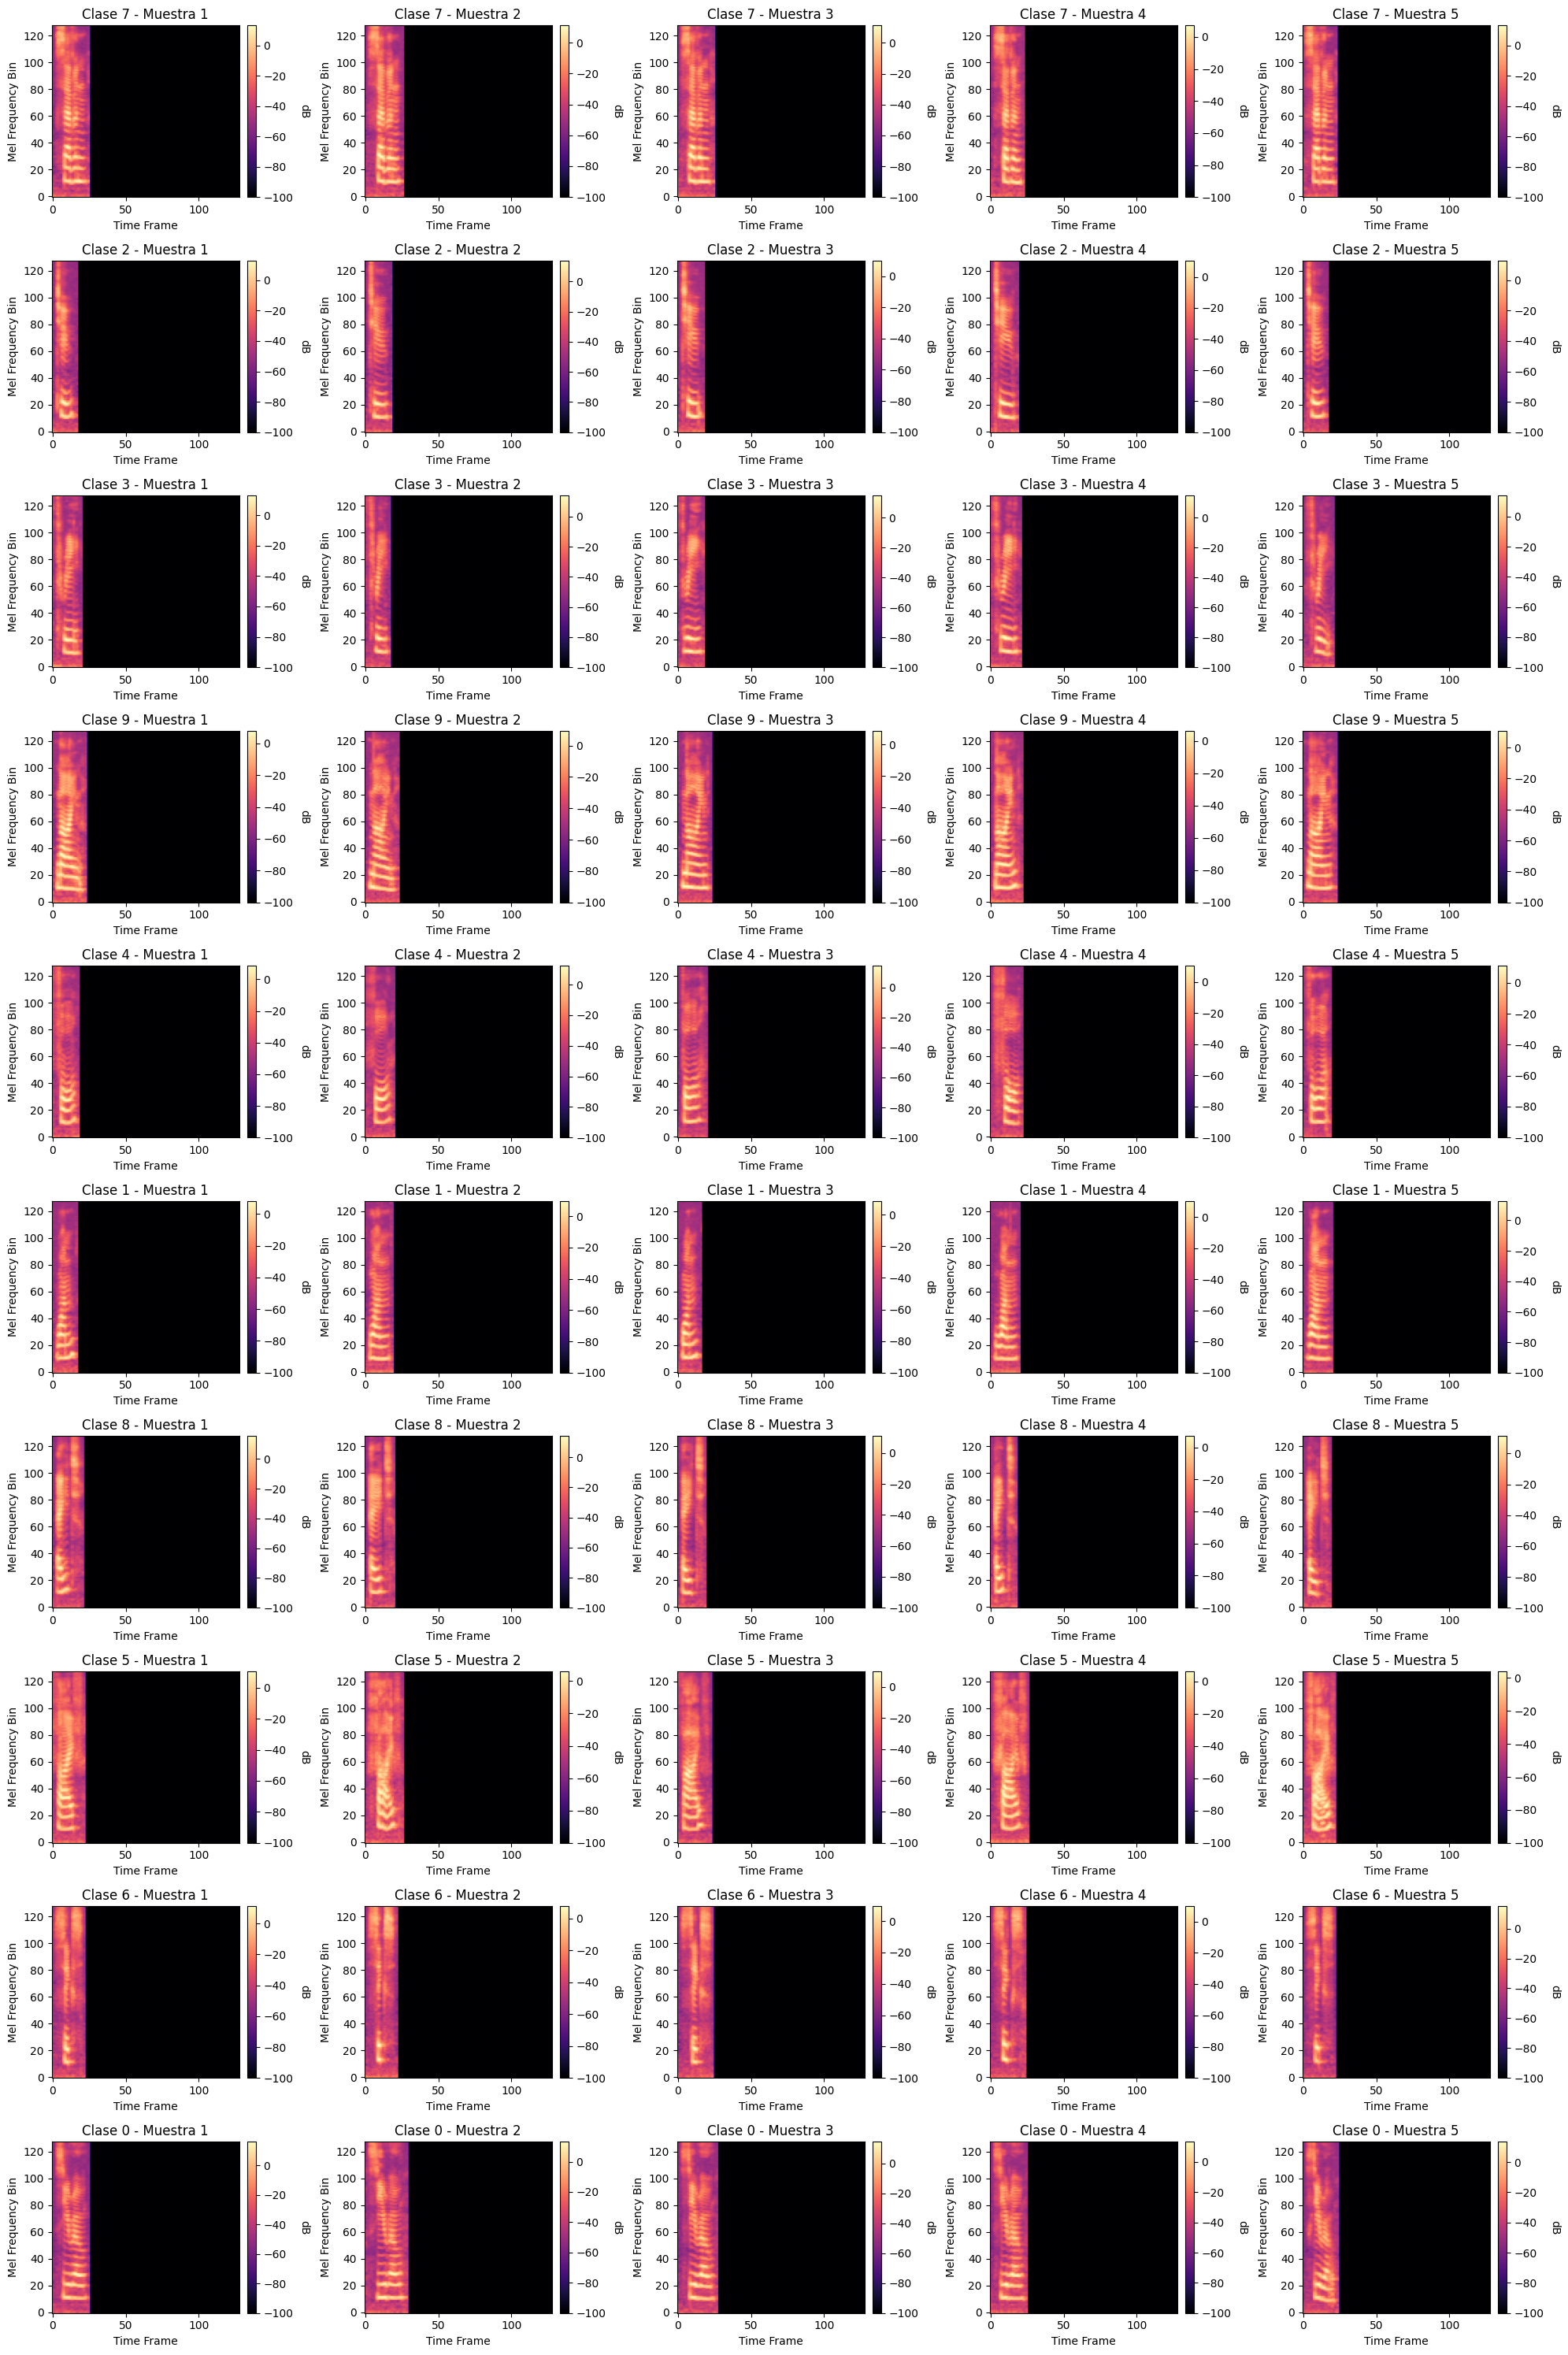

In [69]:
# Obtener muestras por clase y visualizarlas
class_samples_mel = get_samples_per_class(audio_mnist_mel, num_samples=5)
plot_samples(class_samples_mel, feature_type='melspectrogram')

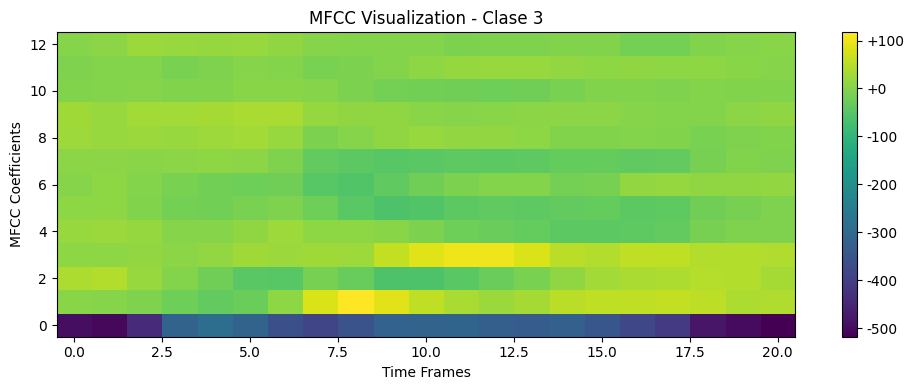

In [71]:
# Crear dataset con MFCC
feature_type = 'mfcc'
audio_mnist_mfcc = AudioMNISTDataset(
    root_dir="data/AUDIO_MNIST", 
    split='train', 
    feature_type=feature_type, 
    hop_length=512,
    n_mfcc=13
)#

# Visualizar una muestra individual
sample, label = audio_mnist_mfcc[3]
plot_single_sample(sample, feature_type, title=f"Clase {label}")

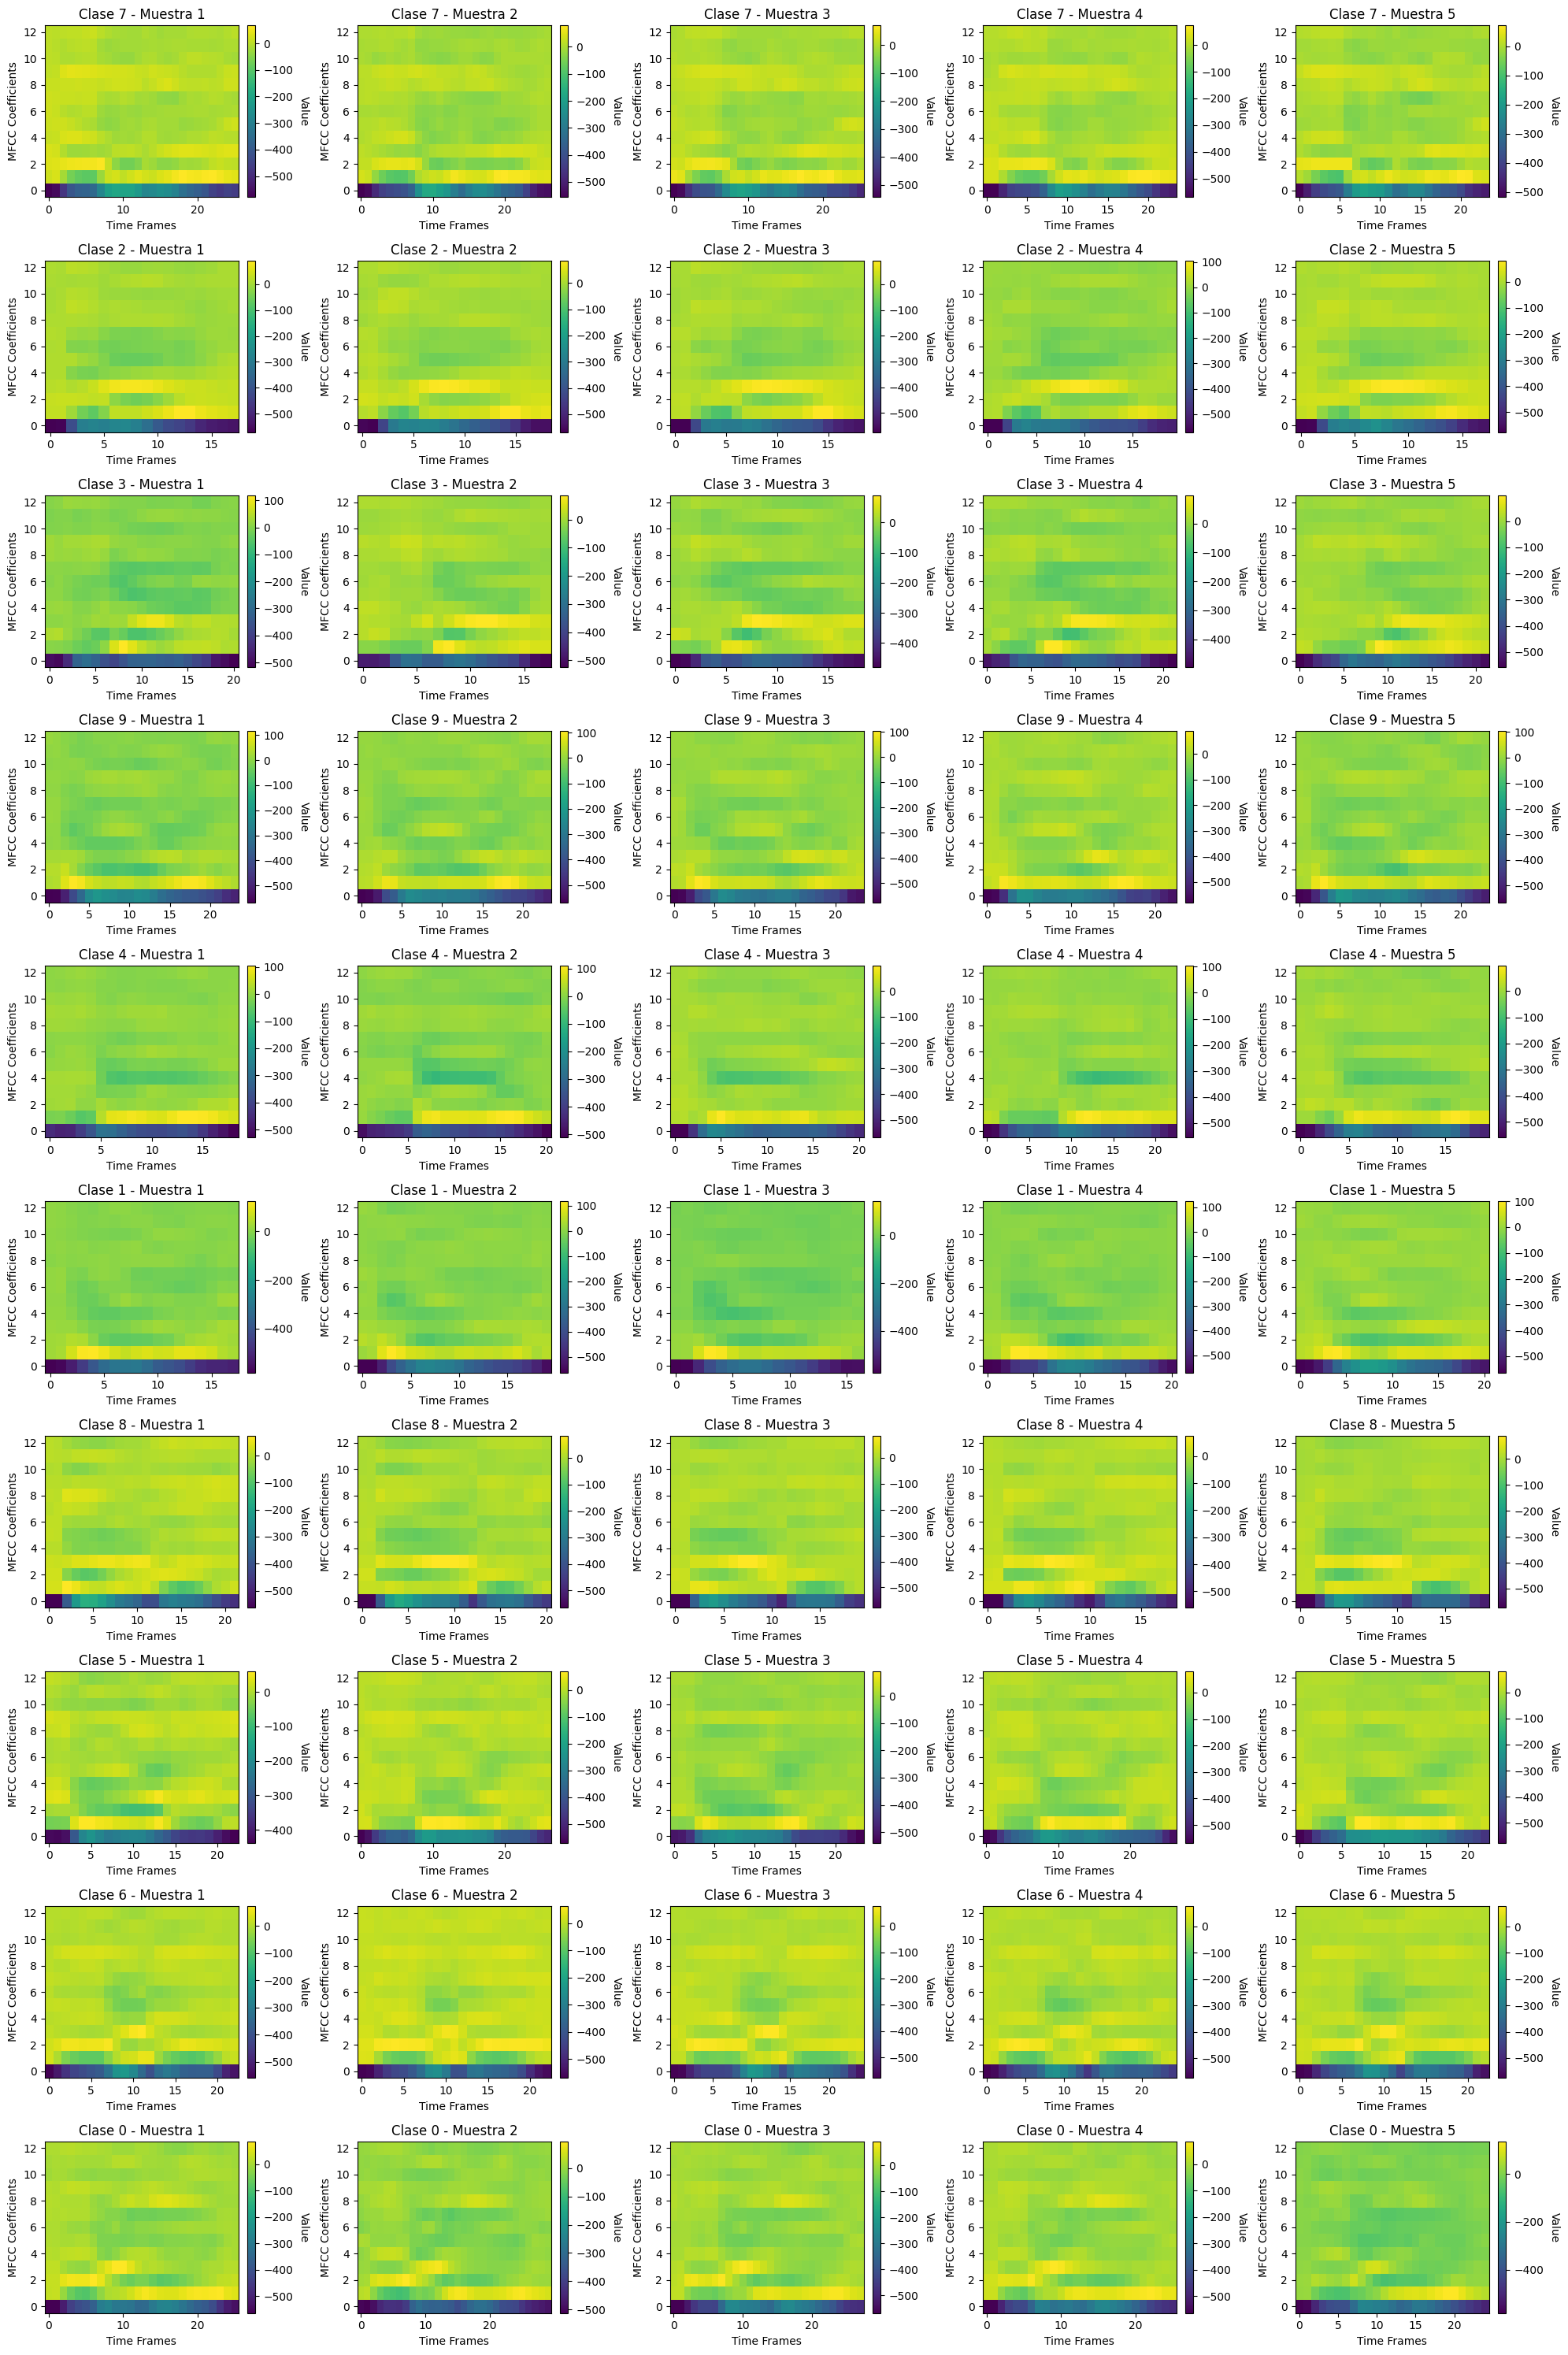

In [72]:
# Obtener muestras por clase y visualizarlas
class_samples_mfcc = get_samples_per_class(audio_mnist_mfcc, num_samples=5)
plot_samples(class_samples_mfcc, feature_type='mfcc')

## Otros Datasets Soportados

El notebook también soporta los datasets GTZAN y URBANSOUND8K. Aquí hay ejemplos de cómo usarlos:

In [ ]:
# Ejemplo para GTZAN (descomenta si tienes el dataset)
# from src.datasets import GTZANDataset
# gtzan_dataset = GTZANDataset(
#     root_dir="data/GTZAN", 
#     split='val', 
#     feature_type='melspectrogram'
# )
# show_dataset_info(gtzan_dataset, "GTZAN")
# gtzan_samples = get_samples_per_class(gtzan_dataset, num_samples=3)
# plot_samples(gtzan_samples, feature_type='melspectrogram')

print("Ejemplo de GTZAN comentado. Descomenta si tienes el dataset disponible.")

In [73]:
from src.datasets import UrbanSound8KDataset
urban_dataset = UrbanSound8KDataset(
    root_dir="data/URBANSOUND8K", 
    split='val', 
    feature_type='melspectrogram'
)
urban_samples = get_samples_per_class(urban_dataset, num_samples=3)
plot_samples(urban_samples, feature_type='melspectrogram')


ValueError: Image size of 2000x495900 pixels is too large. It must be less than 2^16 in each direction.

Error in callback <function _draw_all_if_interactive at 0x12fbb6430> (for post_execute), with arguments args (),kwargs {}:


ValueError: Image size of 2000x495900 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 2000x495900 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 2000x495900 with 9918 Axes>